In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_orders = pd.read_csv('data/out_default_orders_clean.csv', sep=";", header=0)

In [2]:
# Clear orders.
df_orders.drop(labels=['orderStatusID', 'clearedDate', 'cleared', 'currency', 'articleName', 'articleId'], axis=1, inplace=True)
df_orders = df_orders[(df_orders.number != -0) & (df_orders.shopId == 1)]
df_orders.referer = df_orders.referer.fillna('')
#print(df_orders.head(10))

In [3]:
# Da in der Datei pro lineitem immer der Preis mit dran steht, müssen die doppelten entfernt werden.
df_orders = df_orders.drop_duplicates(subset="number", keep='first')
#print(df_orders.head(50))

In [4]:
#df_orders['invoiceAmount','invoiceAmountNet','invoiceShipping'].hist(bins=100, figsize=(30,30))
df_orders.drop(labels=['number', 'orderId', 'customerId', 'shopId', 'orderTime', 'referer', 'orderDetailId', 'articleNumber', 'price', 'quantity', 'taxRate'], axis=1, inplace=True)
df_orders['invoiceAmount'] = df_orders['invoiceAmount'].str.replace(',','.')
df_orders['invoiceAmount'] = df_orders['invoiceAmount'].astype(float)
df_orders['invoiceShipping'] = df_orders['invoiceShipping'].str.replace(',','.')
df_orders['invoiceShipping'] = df_orders['invoiceShipping'].astype(float)
df_orders['invoiceAmountNet'] = df_orders['invoiceAmountNet'].str.replace(',','.')
df_orders['invoiceAmountNet'] = df_orders['invoiceAmountNet'].astype(float)
#print(df_orders)

AxesSubplot(0.125,0.125;0.775x0.755)


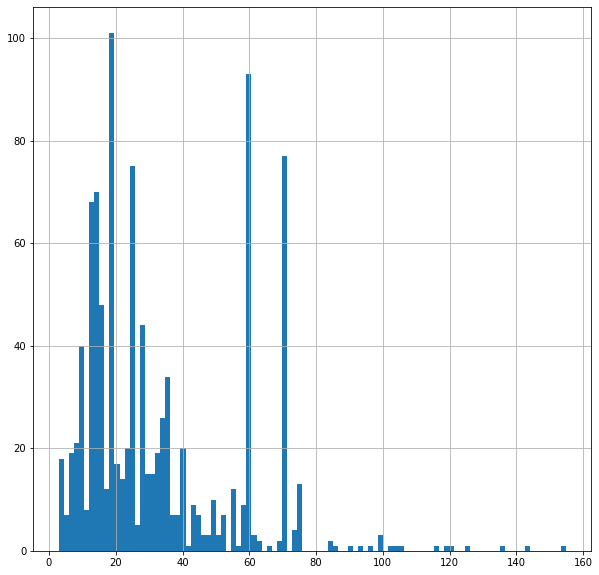

In [11]:
print(df_orders['invoiceAmount'].hist(bins=100, figsize=(10,10)))

In [6]:
invoiceAmount=df_orders['invoiceAmount'].value_counts()

NameError: name 'o' is not defined

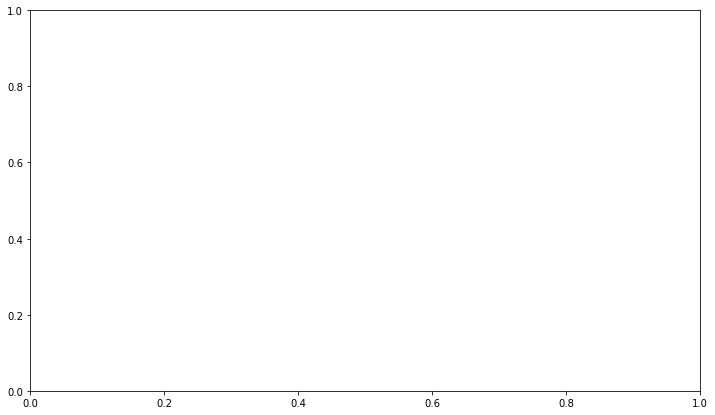

In [7]:
import seaborn as sn
# Defining figure size  
# for the output plot 
fig, ax = plt.subplots(figsize = (12, 7))

idx = ['1', '2']
  
# Defining columns for the dataframe
cols = list('ic')
  
# Entering values in the index and columns  
# and converting them into a panda dataframe
df = pd.DataFrame(o, columns = cols, index = idx)
  
df = pd.DataFrame(df, columns =['invoice', 'count'])
  
corr = df.corr()
sn.heatmap(corr, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)